In [3]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
#from Hofstadter_Matrix_in_k_space import *

In [4]:
#!! 
#Hofstadter_Matrix_in_k_space içindeki kodları buraya alınca sorunsuz çalışırken, kodları çağırdığımda hata veriyor !

import numpy as np

# Inıtial of q value
q=3

#Hamiltonian Matrix for Hofstadter Model (doesn't include alpha=1/2 matrix)
def HMatrix(alfa, k_x, k_y):
    M = np.zeros((q,q), dtype=complex) 
    for i in range (0, q):
        M[i,i]=2*np.cos(k_y-2*np.pi*alfa*i) 
        if i==q-1: 
            M[i,i-1]=1
        elif i==0: 
            M[i,i+1]=1
        else: 
            M[i,i-1]=1
            M[i,i+1]=1
        M[0,q-1]=np.exp(-q*1.j*k_x)
        M[q-1,0]=np.exp(q*1.j*k_x)
    return M

#Special Hofstadter Matrix Just alpha=1/2
s = 2
alpha = 1/s
def HMatrix2(alpha, k_x, k_y):
    M2 = np.zeros((s,s), dtype=complex) 
    for i in range (0, s):
        M2[i,i]=2*np.cos(k_y-2*np.pi*alpha*i) 
        if i==q-1: 
            M2[i,i-1]=1
        M2[0,s-1]=1+np.exp(-s*1.j*k_x)
        M2[s-1,0]=1+np.exp(s*1.j*k_x)
    return M2

#Set Rational to Alpha Values 
def gcd(a, b): 
    if b == 0: return a
    return gcd(b, a % b)

#!!

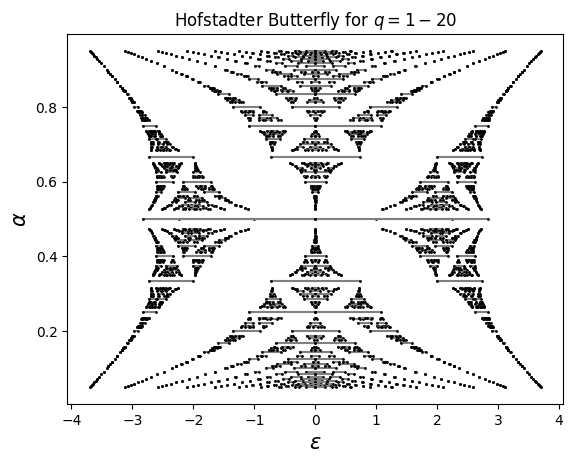

In [5]:
#Plot Hofstadter Butterfly
import matplotlib.pyplot as plt
q_max = 20
for p in range(1, q_max+1):
    for q in range(1, q_max+1):
        if q>p:
            if gcd(p, q) == 1:
                alfa = p/q
                y = np.zeros(q)
                y[:] = alfa
                
                x_1 = np.linalg.eigvalsh(HMatrix(alfa, k_x=0, k_y=0))
                x_2 = np.linalg.eigvalsh(HMatrix(alfa, k_x=np.pi/q, k_y=np.pi/q))

                for i in range(len(x_1)):
                    plt.plot([x_1[i],x_2[i]], y[:2], '-', c='gray', markersize=5)
  
                plt.plot(x_1, y, 'o', c='black', markersize=1)
                plt.plot(x_2, y, 'o', c='black', markersize=1)
    
#Just Plot alpha=1/2
y2 = np.zeros(s)
y2[:] = alpha
x_3 = np.linalg.eigvalsh(HMatrix2(alpha, k_x=0, k_y=0))
x_4 = np.linalg.eigvalsh(HMatrix2(alpha, k_x=np.pi/s, k_y=np.pi/s))
for i in range(len(x_3)):
    plt.plot([x_3[i],x_4[i]], y2[:2], '-', c='gray', markersize=5)
plt.plot(x_3, y2, 'o', c='black', markersize=1)
plt.plot(x_4, y2, 'o', c='black', markersize=1)
        
plt.xlabel(r'$\epsilon$', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=15)
plt.title(r'Hofstadter Butterfly for $q=1-$'+str(q))       
plt.show()